In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# DATA ANALYSIS

In [54]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

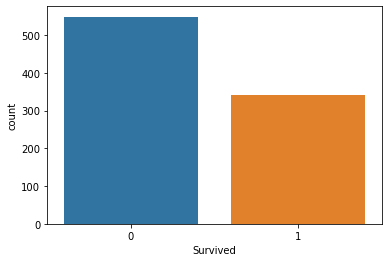

In [8]:
#countplot of subrvived vs not  survived
sns.countplot(x='Survived',data=df)

In [55]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

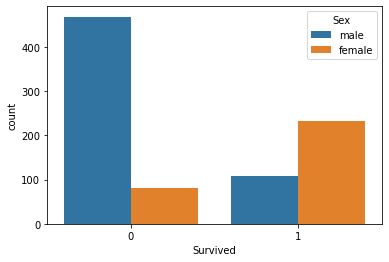

In [9]:
#Male vs Female Survived?
sns.countplot(x='Survived',data=df,hue='Sex')

E:\p\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

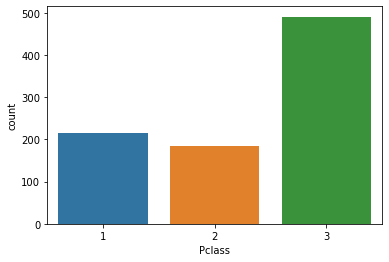

In [57]:
sns.countplot('Pclass', data=df)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

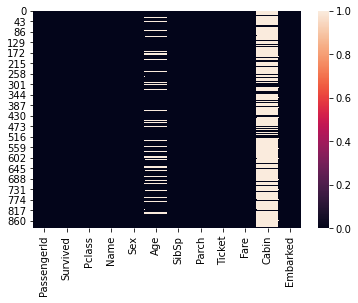

In [11]:
#Visualize null values with heat map
sns.heatmap(df.isna())


In [12]:
# DATA CLEANING

In [13]:
#filling missing value in age column with mean

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
#checking for null value in age
df['Age'].isna().sum()

0

In [16]:
#finding the mode value in Embark column

In [17]:
print(df['Embarked'].mode())

0    S
dtype: object


In [18]:
print(df['Embarked'].mode()[0])

S


In [19]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
#droping cabin column

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:
# converting categorical value into numerical 

In [24]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [26]:
#droping the columns which are not required

In [27]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [29]:
#Seperating Dependent and Independent variables

In [30]:
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

In [31]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [32]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [33]:
#Model Training

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (623, 7) (268, 7)


In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
# Getting the predicted values on the train set

In [40]:
X_train_prediction = lr.predict(X_train)

In [41]:
print(X_train_prediction)

[0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 

In [42]:
from sklearn import metrics

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
predict=lr.predict(X_test)

In [45]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,139,20
Actual Yes,36,73


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8089887640449438


In [48]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)

In [49]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7910447761194029


In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.67      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [52]:
##############################################